# &#128060; Código Parcial Métodos Numéricos &#128060; 

# Integración Numérica

## Ejercicio 1

En cálculo multivariable y en cursos de estadística se muestra que: 

$\int_{-\infty}^{\infty}\frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x}{\sigma})^2}dx = 1$

para cualquier $\sigma$ positivo. La función 

$f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x}{\sigma})^2}$

Es la función normal de la densidad donde $\mu = 0$ y la desviación estandar $\sigma$. La probabilidad de que un valor elegido al azar descrito por esta distribución se encuentre en [a, b] está dada por la integral de la función de densidad en ese intervalo, es decir: 

$\int_{a}^{b}f(x)dx$

Aproxime, con un error máximo de $10^{-5}$, la probabilidad de que un valor elegido al azar descrito por esta distribución se encuentre en:"

$(a) [-\sigma, \sigma]$

$(b) [-2\sigma, 2\sigma]$ 

$(c) [-3\sigma, 3\sigma]$

### 👻 Método de Simpson $\frac{1}{3}$ Compuesto👻

In [1]:
#------------------------------------------------------------------------------------------
### Importación de librerías ###
#------------------------------------------------------------------------------------------

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math

#------------------------------------------------------------------------------------------
### Método del Simpson 1/3 de aplicación Múltiple ###
#------------------------------------------------------------------------------------------

def partir_intervalo(a, b, n):
    """
    Toma un intervalo definido por los valores 'inicio' y 'fin', y lo divide en 'num_partes'
    partes iguales. Retorna una lista con los puntos resultantes.
    """
    intervalo = b - a
    paso = intervalo / (n)  
    puntos = [a + i * paso for i in range(n + 1)]
    return(puntos) 

def MetodoSimpsonCompuesto(f, r_0, a, b, n, intervalo):
  '''
  Para las sumatorias necesitamos los intervalos de los impares y los pares
  '''
  L_1 = []
  L_2 = []
  h = (b-a)/n
  for i in range(0, math.ceil(len(intervalo)/2), 1):
     L_1.append(intervalo[2*i-1])
     L_2.append(intervalo[2*i])
  L_1.pop(0)
  L_2.pop(0)
  L_2.pop(-1)
  i=0
  Sumfl1 = 0
  while(i<len(L_1)):
     Sumfl1 += f(L_1[i],r_0)
     i += 1
  i=0
  Sumfl2 = 0
  while(i<len(L_2)):
     Sumfl2 += f(L_2[i],r_0)
     i += 1
  I = (h/3)*(f(a,r_0) + 4*Sumfl1 + 2*Sumfl2 + f(b,r_0))
  return(I)

#------------------------------------------------------------------------------------------
### Definiendo la función ###
#------------------------------------------------------------------------------------------

def f_1(x, r):
  return((1/(r*np.sqrt(2*np.pi)))*np.exp(-(1/2)*(x/r)**2))

#------------------------------------------------------------------------------------------
### Llamando la función ###
#------------------------------------------------------------------------------------------

### Datos ###

R1 = 1

N = 70

Intervalo1 = partir_intervalo(-R1, R1, N)
Intervalo2 = partir_intervalo(-2*R1, 2*R1, N)
Intervalo3 = partir_intervalo(-3*R1, 3*R1, N)

Integral1 = MetodoSimpsonCompuesto(f_1, R1, -R1, R1, N, Intervalo1)
Integral2 = MetodoSimpsonCompuesto(f_1, R1, -2*R1, 2*R1, N, Intervalo2)
Integral3 = MetodoSimpsonCompuesto(f_1, R1, -3*R1, 3*R1, N, Intervalo3)

#------------------------------------------------------------------------------------------
### Imprimir ###
#------------------------------------------------------------------------------------------

print("La aproximación a la integral de la función utilizando el método de Simpson 1/3 compuesto es:")

print()

print("a) I = ", Integral1)

print()

print("b) I = ", Integral2)

print()

print("c) I =", Integral3)

La aproximación a la integral de la función utilizando el método de Simpson 1/3 compuesto es:

a) I =  0.6826894957213894

b) I =  0.9544997232662847

c) I = 0.9973001561352707


### 🎃 Método de Romberg 🎃

In [8]:
#------------------------------------------------------------------------------------------
### Importación de librerías ###
#------------------------------------------------------------------------------------------

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math

#------------------------------------------------------------------------------------------
### Método del Romberg con Trapecio Compuesto ###
#------------------------------------------------------------------------------------------
### Primero se trae el método del trapecio compuesto

def partir_intervalo(inicio, fin, num_partes):
    """
    Toma un intervalo definido por los valores 'inicio' y 'fin', y lo divide en 'num_partes'
    partes iguales. Retorna una lista con los puntos resultantes.
    """
    intervalo = fin - inicio
    paso = intervalo / (num_partes)  # Se resta 1 para asegurar que el punto 'fin' esté incluido.
    puntos = [inicio + i * paso for i in range(num_partes + 1)]
    puntos.pop(0)
    puntos.pop(-1)
    return(puntos) 

def MetodoTrapecioCompuesto(f, a, b, intervalo, n, r):
    SumFxi = 0
    for i in range(0, len(intervalo), 1):
        SumFxi += f(intervalo[i], r)
    h = (b-a)/n
    I = (h/2)*(f(a, r) + 2*(SumFxi) + f(b, r))
    return(I)

### Se define el método de Romberg

def MetodoRomberg(f, a, b, lista, r):
    Intervalo = []
    I_i = []
    I_Tot = []
    for i in range(0, len(lista), 1):    # Crea una lista de listas, con los intervalos partidos en n puntos
        Intervalo.append(partir_intervalo(a, b, lista[i]))
    for i in range(0, len(Intervalo), 1):      # Crea una lista con los resultados del método del trapecio para cada lista
        I_i.append(MetodoTrapecioCompuesto(f, a, b, Intervalo[i], lista[i], r))
    l = len(lista)
    for i in range(0, l - 1, 1):  #Aplica el método de Romberg donde se termina con un sólo elemento
        for j in range(0, len(I_i) - 1, 1):
            Aprox = I_i[j+1] + (1/(lista[i+1]**2 - 1))*(I_i[j+1] - I_i[j])
            I_Tot.append(Aprox)
        I_i = I_Tot
        I_Tot =[]
    return(I_i)

#------------------------------------------------------------------------------------------
### Definiendo la función ###
#------------------------------------------------------------------------------------------

def f_1(x, r):
  return((1/(r*np.sqrt(2*np.pi)))*np.exp(-(1/2)*(x/r)**2))

#------------------------------------------------------------------------------------------
### Llamando la función ###
#------------------------------------------------------------------------------------------

### Datos ###

R1 = 1

Lista = [1, 2, 4, 8]

Evalf1 = MetodoRomberg(f_1, -R1, R1, Lista, R1)
Evalf2 = MetodoRomberg(f_1, -2*R1, 2*R1, Lista, R1)
Evalf3 = MetodoRomberg(f_1, -3*R1, 3*R1, Lista, R1)

#------------------------------------------------------------------------------------------
### Imprimir ###
#------------------------------------------------------------------------------------------

print("La aproximación a la integral de la función utilizando el método de Romberg es:")

print()

print("a) I = ", Evalf1[0])

print()

print("b) I = ", Evalf2[0])

print()

print("c) I = ", Evalf3[0])

La aproximación a la integral de la función utilizando el método de Romberg es:

a) I =  0.6826927276908906

b) I =  0.9552029128185233

c) I =  1.0039946156900312


# Ecuaciones Diferenciales

## 🔎 Ejercicio 1 🔎

El movimiento de un sistema acoplado masa resorte (Véase la figura) está descrito por la siguiente ecuación diferencial ordinaria:

$m\frac{d^2 x}{dt^2} + c\frac{dx}{dt} + kx = 0$

Donde $x = $ desplazamiento desde la posición de equilíbrio (m), $t= $ timpo(s), $m = 20 kg$ de masa y $c = $ coeficiente de amortiguamiento $(N\cdot s/m)$. El coeficiente de amortiguamiento $c$ adopta tres valores, $5$ (subamortiguado), $40$ (amortiguamiento crítico), y $200$ (sobreamortiguado). La constante del resorte es $k = 20 N/m$. La velocidad inicial es cero y el desplazamiento inicial es de $x = 1m$. Resuelva esta ecuación con el uso de un método numérico durante el periodo de tiempo $0 \leq t  \leq 15s$. Grafique el desplazamiento versus el tiempo para cada uno de los tres valores del coeficiente de amortiguamiento sobre la misma curva. Use RK-4 y Euler.

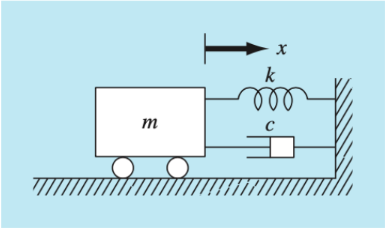

### 👻 Método de Euler 👻

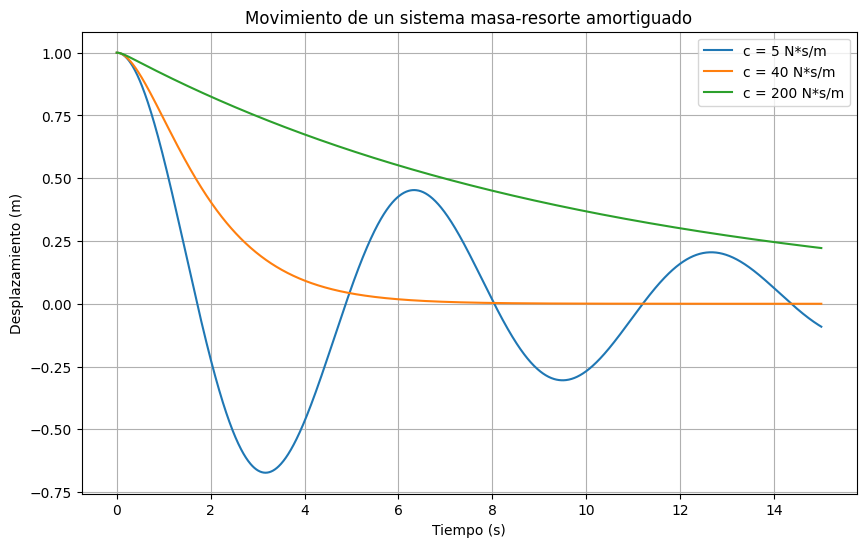

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
m = 20  # masa (kg)
k = 20  # constante del resorte (N/m)
c_values = [5, 40, 200]  # valores del coeficiente de amortiguamiento (N*s/m)
x0 = 1  # desplazamiento inicial (m)
v0 = 0  # velocidad inicial (m/s)
t_start = 0  # tiempo inicial (s)
t_end = 15  # tiempo final (s)
dt = 0.01  # paso de tiempo (s)

# Función para la ecuación diferencial
def f(t, x, v, c):
    return -k * x / m - c * v / m

# Método de Euler
def euler():
    t = [t_start]
    x = [x0]
    v = [v0]
    
    while t[-1] < t_end:
        x.append(x[-1] + dt * v[-1])
        v.append(v[-1] + dt * f(t[-1], x[-1], v[-1], c))
        t.append(t[-1] + dt)
    
    return t, x

# Gráficos
plt.figure(figsize=(10, 6))

for c in c_values:
    t, x = euler()
    plt.plot(t, x, label=f'c = {c} N*s/m')

plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (m)')
plt.title('Movimiento de un sistema masa-resorte amortiguado')
plt.legend()
plt.grid(True)
plt.show()


### ✔Método de RK-4✔

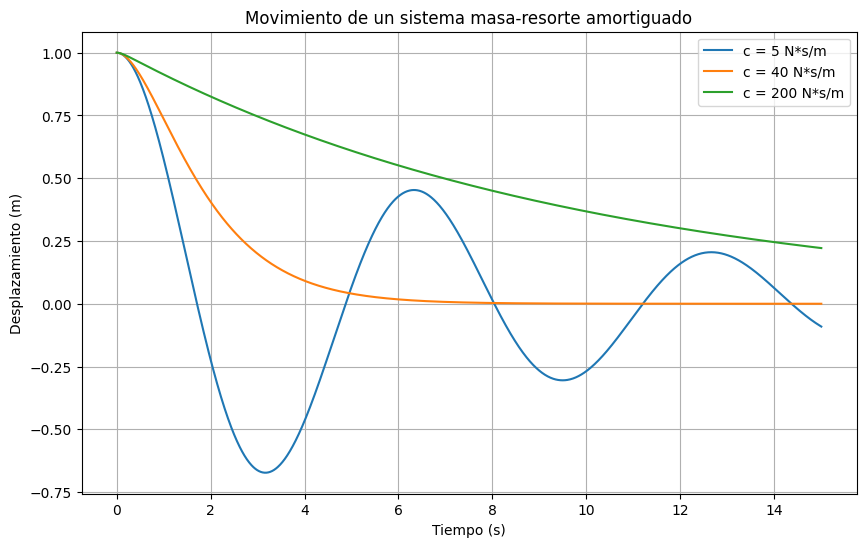

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
m = 20  # masa (kg)
k = 20  # constante del resorte (N/m)
c_values = [5, 40, 200]  # valores del coeficiente de amortiguamiento (N*s/m)
x0 = 1  # desplazamiento inicial (m)
v0 = 0  # velocidad inicial (m/s)
t_start = 0  # tiempo inicial (s)
t_end = 15  # tiempo final (s)
dt = 0.01  # paso de tiempo (s)

# Función para la ecuación diferencial
def f(t, x, v, c):
    return -k * x / m - c * v / m

# Método de Runge-Kutta de cuarto orden (RK-4)
def rk4():
    t = [t_start]
    x = [x0]
    v = [v0]
    
    while t[-1] < t_end:
        h = dt
        k1x = h * v[-1]
        k1v = h * f(t[-1], x[-1], v[-1], c)
        
        k2x = h * (v[-1] + 0.5 * k1v)
        k2v = h * f(t[-1] + 0.5 * h, x[-1] + 0.5 * k1x, v[-1] + 0.5 * k1v, c)
        
        k3x = h * (v[-1] + 0.5 * k2v)
        k3v = h * f(t[-1] + 0.5 * h, x[-1] + 0.5 * k2x, v[-1] + 0.5 * k2v, c)
        
        k4x = h * (v[-1] + k3v)
        k4v = h * f(t[-1] + h, x[-1] + k3x, v[-1] + k3v, c)
        
        x.append(x[-1] + (k1x + 2 * k2x + 2 * k3x + k4x) / 6)
        v.append(v[-1] + (k1v + 2 * k2v + 2 * k3v + k4v) / 6)
        t.append(t[-1] + dt)
    
    return t, x

# Gráficos
plt.figure(figsize=(10, 6))

for c in c_values:
    t, x = rk4()
    plt.plot(t, x, label=f'c = {c} N*s/m')

plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (m)')
plt.title('Movimiento de un sistema masa-resorte amortiguado')
plt.legend()
plt.grid(True)
plt.show()
